In [1]:
!pip install fiona
import geopandas as gpd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
from fiona import listlayers

germanyMapsLink = "https://github.com/CienciaDeDatosEspacial/intro_geodataframe/raw/main/maps/worldMaps.gpkg"

# Cargar los datos de los países, ciudades y ríos
countries = gpd.read_file(germanyMapsLink, layer='countries')
cities = gpd.read_file(germanyMapsLink, layer='cities')
rivers = gpd.read_file(germanyMapsLink, layer='rivers')

# Seleccionar Alemania y proyectar a un CRS adecuado para cálculos geométricos
alemania = countries[countries.COUNTRY == 'Germany']
alemania_projected = alemania.to_crs(epsg=3068) # Código CRS para cálculos geométricos

# Capas en el mapa de alemania
listlayers(germanyMapsLink)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 16.7 MB/s eta 0:00:00


['indicators', 'countries', 'rivers', 'cities']

<Axes: >

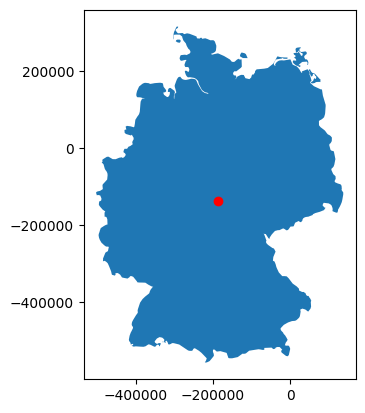

In [2]:
#Reproyeccion del mapa
alemania.to_crs(3068).crs.axis_info
alemania.to_crs(5641).centroid
base3068=alemania.to_crs(3068).plot()
# Ploteamos el mapa de Alemania
alemania.to_crs(3068).centroid.plot(color='red',ax=base3068)

In [3]:
# Importamos los estados y distritos
alemania_states=gpd.read_file('https://github.com/DiegoAntonio-web/introgeodf/raw/refs/heads/main/maps_alemania/germany_States_level_1.shp')
alemania_district=gpd.read_file('https://github.com/DiegoAntonio-web/introgeodf/raw/refs/heads/main/maps_alemania/germany_District_level_2.shp')

In [4]:
alemania_district.head()

,shape2,shapeiso,shapeid,shapegroup,shapetype,shape1,shape0,geometry
0,Stuttgart,None,9070358B86745718691241,DEU,ADM2,Baden-Wurttemberg,germany,"MULTIPOLYGON (((8.7689 48.52184, 8.76498 48.52..."
1,Karlsruhe,None,9070358B19876986675637,DEU,ADM2,Baden-Wurttemberg,germany,"MULTIPOLYGON (((9.41092 49.66351, 9.41106 49.6..."
2,Freiburg,None,9070358B61051204169762,DEU,ADM2,Baden-Wurttemberg,germany,"MULTIPOLYGON (((9.12593 47.66864, 9.12577 47.6..."
3,Tubingen,None,9070358B15022388296844,DEU,ADM2,Baden-Wurttemberg,germany,"POLYGON ((8.7689 48.52184, 8.76953 48.52369, 8..."
4,Oberbayern,None,9070358B1315543690610,DEU,ADM2,Bayern,germany,"POLYGON ((10.88629 47.53674, 10.88476 47.53751..."


In [42]:
import pandas as pd

#Capas de alemania
states = alemania_states
municipalities = alemania_district

# Agregamos la informacion de los aeropuertos
infoairports=pd.read_csv('https://github.com/DiegoAntonio-web/introgeodf/raw/refs/heads/main/data/airports.csv')
# Filtramos para tener los aeropuertos de Alemania
german_airports = infoairports[infoairports['iso_country'] == 'DE']
# Limpiamos los valores de coordenadas incoherentes
german_airports = german_airports[~german_airports['id'].isin([554300, 537347])]

airports = german_airports
airports

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords
21224,45044,DE-0001,heliport,Klinikum am Plattenwald Helipad,49.212856,9.236729,NaN,EU,DE,DE-BW,Bad Friedrichshall,no,NaN,NaN,NaN,NaN,NaN,NaN
21225,332693,DE-0002,closed,Ahlhorn Highway Strip,52.929984,8.173538,NaN,EU,DE,DE-NI,Großenkneten,no,NaN,NaN,NaN,NaN,NaN,Ahlhorn Autobahn-Notlandeplatz NLP
21226,299694,DE-0003,small_airport,August Euler Airfield,49.853757,8.586243,358.0,EU,DE,DE-HE,Griesheim,no,EDES,NaN,NaN,https://web.archive.org/web/20201019233127/htt...,https://en.wikipedia.org/wiki/Griesheim_Airport,"ZCS, August-Euler Flugplatz, Griesheim Airport"
21227,28576,DE-0004,small_airport,Gransee Airfield,53.006280,13.202177,164.0,EU,DE,DE-BR,Gransee,no,EDUG,NaN,NaN,http://www.gojump.de/,https://de.wikipedia.org/wiki/Flugplatz_Gransee,NaN
21228,322973,DE-0005,small_airport,Warngau Airfield,47.823990,11.703980,2380.0,EU,DE,DE-BY,Warngau,no,NaN,NaN,NaN,http://www.fliegerclub-warngau.de,NaN,"münchen, munich, wargau"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29556,34923,GWW,closed,Gatow Airport,52.474400,13.138100,161.0,EU,DE,DE-BE,Spandau,no,NaN,NaN,NaN,NaN,https://en.wikipedia.org/wiki/Gatow_Airport,"GWW, EDBG, General-Steinhoff Kaserne, Luftwaff..."
29745,355231,HHBG,heliport,Christoph Hansa ADAC Helipad,53.507971,10.173382,136.0,EU,DE,DE-HH,Hamburg,no,NaN,NaN,NaN,NaN,https://de.wikipedia.org/wiki/Christoph_Hansa,"HHBG, BG Klinikum Boberg"
53697,46652,RHST,small_airport,Rheinstetten Glider Field,48.977700,8.342500,380.0,EU,DE,DE-BW,Rheinstetten,no,NaN,NaN,NaN,http://www.sfg-reiselfingen.de/,NaN,NaN
77507,308946,WID,closed,RAF Wildenrath,51.114100,6.215100,285.0,EU,DE,DE-NW,British Armed Forces,no,NaN,NaN,NaN,NaN,https://en.wikipedia.org/wiki/RAF_Wildenrath,"WID, WID"


In [27]:
#Añadir puertos maritimos
import pandas as pd

portsFileLink="https://github.com/CienciaDeDatosEspacial/GeoDataFrame_Analytics/raw/main/data/UpdatedPub150.csv"

infoseaports = pd.read_csv(portsFileLink)
infoseaports

,World Port Index Number,Region Name,Main Port Name,Alternate Port Name,UN/LOCODE,Country Code,World Water Body,IHO S-130 Sea Area,Sailing Direction or Publication,Publication Link,...,Supplies - Fuel Oil,Supplies - Diesel Oil,Supplies - Aviation Fuel,Supplies - Deck,Supplies - Engine,Repairs,Dry Dock,Railway,Latitude,Longitude
0,7950.0,United States E Coast -- 6585,Maurer,,,United States,North Atlantic Ocean,,U.S. Coast Pilot 2 - Atlantic Coast: Cape Cod ...,https://nauticalcharts.noaa.gov/publications/c...,...,Yes,Yes,Unknown,Yes,Yes,Moderate,Unknown,Unknown,40.533333,-74.250000
1,52235.0,Sulawesi -- 51970,Mangkasa Oil Terminal,,,Indonesia,Teluk Bone; Banda Sea; South Pacific Ocean,,Sailing Directions Pub. 163 (Enroute) - Borneo...,https://msi.geo.nga.mil/api/publications/downl...,...,No,No,Unknown,No,No,NaN,Unknown,Unknown,-2.733333,121.066667
2,47620.0,Madagascar -- 47350,Iharana,,,Madagascar,Indian Ocean,,Sailing Directions Pub. 171 (Enroute) - East A...,https://msi.geo.nga.mil/api/publications/downl...,...,No,No,Unknown,No,No,Emergency Only,Unknown,Unknown,-13.350000,50.000000
3,47360.0,Madagascar -- 47350,Andoany,,,Madagascar,Mozambique Channel; Indian Ocean,,Sailing Directions Pub. 171 (Enroute) - East A...,https://msi.geo.nga.mil/api/publications/downl...,...,No,No,Unknown,No,No,Emergency Only,Unknown,Unknown,-13.400000,48.300000
4,47020.0,Tanzania -- 46965,Chake Chake,,,Tanzania,Indian Ocean,,Sailing Directions Pub. 171 (Enroute) - East A...,https://msi.geo.nga.mil/api/publications/downl...,...,No,No,Unknown,No,No,Unknown,Unknown,Unknown,-5.250000,39.766667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3734,1560.0,Newfoundland E Coast -- 1410,Lewisporte,,CA LWP,Canada,North Atlantic Ocean,,Sailing Directions Pub. 146 (Enroute) - Newfou...,https://msi.geo.nga.mil/api/publications/downl...,...,Yes,Yes,Unknown,Unknown,Unknown,Limited,Small,Unknown,49.250000,-55.050000
3735,1150.0,,Deception Bay,,CA DEB,Canada,Hudson Strait; Arctic Ocean,,Sailing Directions Pub. 146 (Enroute) - Newfou...,https://msi.geo.nga.mil/api/publications/downl...,...,Yes,Yes,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,62.150000,-74.683333
3736,1260.0,,Nain,,CA NAI,Canada,Labrador Sea; North Atlantic Ocean,,Sailing Directions Pub. 146 (Enroute) - Newfou...,https://msi.geo.nga.mil/api/publications/downl...,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,56.550000,-61.683333
3737,1540.0,Newfoundland E Coast -- 1410,Botwood,,CA BWD,Canada,North Atlantic Ocean,,Sailing Directions Pub. 146 (Enroute) - Newfou...,https://msi.geo.nga.mil/api/publications/downl...,...,Yes,Yes,Unknown,Unknown,Unknown,Limited,Unknown,Unknown,49.133333,-55.333333


In [28]:
# Organizando los nuevos datos
# Filtramos los datos
infoseaports.rename(columns={'Main Port Name':'portName'},inplace=True)
# Mantener solo algunas columnas relevantes y cambiar si hace falta
infoseaports=infoseaports.loc[:,['portName', 'Country Code','Latitude', 'Longitude']]

# Mostrar información del DataFrame para asegurarse de que está correcto
infoseaports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3739 entries, 0 to 3738
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   portName      3739 non-null   object 
 1   Country Code  3739 non-null   object 
 2   Latitude      3739 non-null   float64
 3   Longitude     3739 non-null   float64
dtypes: float64(2), object(2)
memory usage: 117.0+ KB


In [40]:
# Reproyectando y manteniendo solo los puertos de Alemania
# Crear un GeoDataFrame con los puertos como puntos espaciales (sin proyectar)

seaports=gpd.GeoDataFrame(data=infoseaports.copy(),
                           geometry=gpd.points_from_xy(infoseaports.Longitude,
                                                       infoseaports.Latitude),
                          crs=3068)# notice it is unprojected

# Filtramos datos para Alemania
seaports_alemania=seaports[seaports['Country Code']=='Germany'].copy()

# Reseteamos la data filtrada de Alemania
seaports_alemania.reset_index(drop=True, inplace=True)

# Reproyectamos
seaports_alemania_3068=seaports_alemania.to_crs(3068)
seaports_alemania_3068

,portName,Country Code,Latitude,Longitude,geometry
0,Kiel,Germany,54.316667,10.133333,POINT (10.133 54.317)
1,Butzfleth,Germany,53.650000,9.516667,POINT (9.517 53.65)
2,Emden,Germany,53.333333,7.183333,POINT (7.183 53.333)
3,Bremen,Germany,53.133333,8.766667,POINT (8.767 53.133)
4,Nordenham,Germany,53.483333,8.483333,POINT (8.483 53.483)
5,Bremerhaven,Germany,53.533333,8.583333,POINT (8.583 53.533)
6,Cuxhaven,Germany,53.866667,8.716667,POINT (8.717 53.867)
7,Hamburg,Germany,53.550000,9.933333,POINT (9.933 53.55)
8,Oldenburg,Germany,53.116667,8.216667,POINT (8.217 53.117)
9,Brunsbuttel Elbahafen,Germany,53.883333,9.166667,POINT (9.167 53.883)


<Axes: >

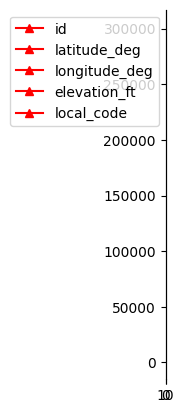

In [34]:
# Subconjunto de aeropuertos grandes
largeAirports = airports[airports['type'] == 'large_airport']
largeAirports.reset_index(drop=True, inplace=True)

# Graficando
base = largeAirports.plot(color='red', marker="^")
seaports_alemania_3068.plot(ax=base, alpha=0.5, markersize=3)

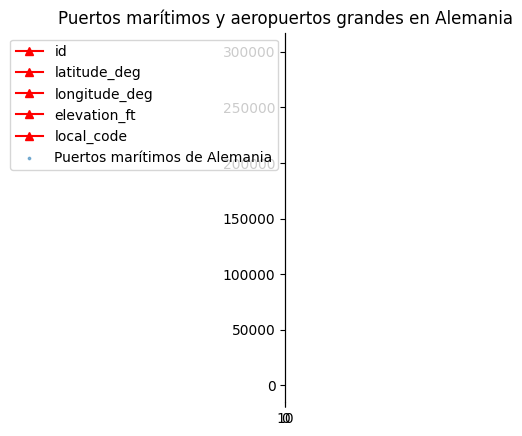

In [35]:
# Graficando aeropuertos grandes
base = largeAirports.plot(color='red', marker="^", label='Aeropuertos grandes')
seaports_alemania_3068.plot(ax=base, alpha=0.5, markersize=3, label='Puertos marítimos de Alemania') # Mismo fallo aqui, no hay data

# Aeropuertos y puertos
base.set_title("Puertos marítimos y aeropuertos grandes en Alemania")
base.legend()

EJERCICIO 1

In [43]:
# Crear la matriz de distancias entre los puertos marítimos y los aeropuertos grandes
distanceMatrixKM_sea_air = seaports_alemania_3068.set_index('portName').geometry.apply(
                           lambda g: largeAirports.set_index('type').geometry.distance(g)/1000).\
                            sort_index(axis=0).sort_index(axis=1)

AttributeError: 'DataFrame' object has no attribute 'geometry'

In [44]:
distanceMatrixKM_sea_air

NameError: name 'distanceMatrixKM_sea_air' is not defined

In [8]:
# Seleccionar un puerto y ordenar las distancias a los aeropuertos de menor a mayor
distanceMatrixKM_sea_air.loc['Frankfurt Airport', :].sort_values(ascending=True)

NameError: name 'distanceMatrixKM_sea_air' is not defined

In [ ]:
# Obtener las dos distancias más cercanas
closest_airports = distanceMatrixKM_sea_air.loc['Frankfurt Airport', :].sort_values(ascending=True).head(2)

# Seleccionar los aeropuertos más cercanos del DataFrame de aeropuertos usando los índices
Closest_Air = airports.loc[closest_airports.index, :]
Closest_Air

In [ ]:
!pip install mapclassify

In [45]:
# Crear el mapa base con los dos aeropuertos más cercanos en rojo
base = Closest_Air.explore(color='red', marker_kwds=dict(radius=10))

seaports_alemania_3068[seaports_in_3068.portName.str.contains('Frankfurt Airport')].explore(m=base, marker_kwds=dict(radius=10))

NameError: name 'Closest_Air' is not defined

EJERCICIO 2

,NAME,SYSTEM,geometry
14,Danube,None,"MULTILINESTRING ((8.73734 47.99981, 9.56016 48..."
61,Rhine,None,"MULTILINESTRING ((6.42693 51.85182, 6.88766 51..."


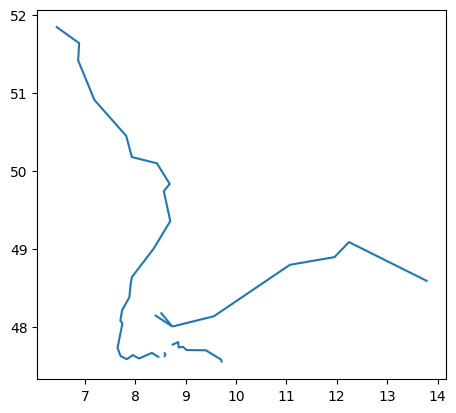

In [9]:
# Sacamos la informacion de los rios
riversGermany_clipped=gpd.clip(rivers,alemania)
gpd.clip(rivers,alemania).plot()
riversGermany_clipped

In [10]:
# Sacamos el río mas grande de Alemania
Rhine = rivers[rivers.NAME.str.contains('Rhine')]

In [11]:
# Calculando la matriz de distancias entre el rio mas grade y los aeropuertos grandes en km
Rhine_filtered = Rhine[Rhine.NAME.str.contains('Rhine')]
distanceMatrixKM_Rhine_air = (
    Rhine_filtered.set_index('NAME').geometry.apply(
        lambda g: largeAirports.set_index('Frankfurt Airport').geometry.distance(g) / 1000
    )
    .sort_index(axis=0)
    .sort_index(axis=1)
)
# Ver la matriz de distancias
distanceMatrixKM_Rhine_air   #cambiar "Nomb_rio", por el rio mas grande de alemania

KeyError: "None of ['Frankfurt Airport'] are in the columns"

In [ ]:
# Ordenar las distancias entre el Nomb_rio y los aeropuertos más cercanos en Alemania
distanceMatrixKM_Nomb_rio_air.iloc[0,:].sort_values(axis=0, ascending=True)   #cambiar "Nomb_rio", por el rio mas grande de alemania

In [ ]:
distanceMatrixKM_Nomb_rio_air.idxmin(axis=1)
distanceMatrixKM_Nomb_rio_air.idxmax(axis=1)

In [ ]:
# Seleccionar el aeropuerto más cercano y el más lejano a partir de la matriz de distancias
Closest_Air = airports.loc[distanceMatrixKM_Ganges_air.iloc[0,:].idxmin(), :]
Far_Air = airports.loc[distanceMatrixKM_Ganges_air.iloc[0,:].idxmax(), :]

Closest_Air, Far_Air

In [ ]:
# Seleccionar el primer y último aeropuerto de la lista
base = Clos_Far_Air.explore(color='red', marker_kwds=dict(radius=10))

# Visualizar el río Ganges en el mapa
rivers[rivers.NAME.str.contains('Rhine')].explore(m=base)

EJERCICIO 3


,NAME,SYSTEM,geometry
14,Danube,None,"MULTILINESTRING ((8.73734 47.99981, 9.56016 48..."
61,Rhine,None,"MULTILINESTRING ((6.42693 51.85182, 6.88766 51..."


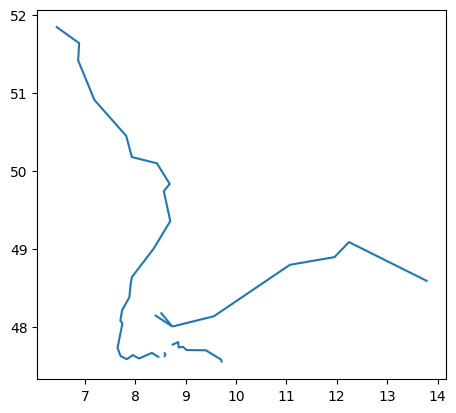

In [20]:
# Pasamos nuestro sistema de rios
# No ubicamos informacion de manera gratuita en internet, solo habia de pago
# https://data.nextgis.com/es/region/DE/base/
gpd.clip(rivers,alemania).plot()
riversGermany_clipped

In [21]:
#Combinamos los rios de los datos geoespaciales creando un nuevo GeoDataFrame
systems=riversGermany_clipped.dissolve(by='NAME')
systems

,geometry,SYSTEM
NAME,,
Danube,"MULTILINESTRING ((8.73734 47.99981, 9.56016 48...",None
Rhine,"MULTILINESTRING ((6.42693 51.85182, 6.88766 51...",None


In [22]:
# Reseteamos los datos para tenerlos listos para trabajar
systems.reset_index(drop=False,inplace=True)

<Axes: >

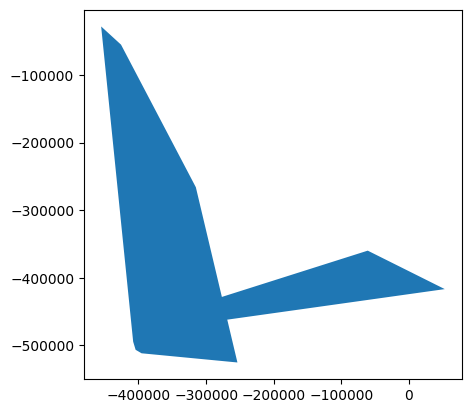

In [23]:
# Reproyectamos las cuencas con el CRS de alemania para generar los convex hulls
systems_3068 = systems.to_crs(3068)
systems_3068.convex_hull.plot()
# Como solo tenemos dos valores nos quedamos con estos valores para trabajar

In [25]:
# Generamos un nuevo GeoDataFrame con el convex hull system
systems_hulls = systems_3068.convex_hull.to_frame()
systems_hulls['system'] = ['Danube', 'Rhine']
systems_hulls.rename(columns={0: 'geometry'}, inplace=True)
systems_hulls = systems_hulls.set_geometry('geometry')
systems_hulls.crs = "EPSG:3068"

In [46]:
# Calculo de las distancias entre sistems_hulls y large airports
c = systems_hulls.set_index('system').geometry.apply(
    lambda g: largeAirports.set_index('type').geometry.distance(g) / 1000
).sort_index(axis=0).sort_index(axis=1)

AttributeError: 'DataFrame' object has no attribute 'geometry'

In [ ]:
# Definimos que aeropuerto se encuentra mas cerca o lejos de las cuencas
mins = distanceMatrixKM_systemsHull_air.idxmin(axis="columns")
maxs = distanceMatrixKM_systemsHull_air.idxmax(axis="columns")
# Ploteamos la informacion con la geometria de los convex hullbase = systems_hulls.explore()
largeAirports[largeAirports.name.isin(mins)].explore(m=base, color='green', marker_kwds=dict(radius=10))
largeAirports[largeAirports.name.isin(maxs)].explore(m=base, color='red', marker_kwds=dict(radius=10))

largeAirports[~largeAirports.name.isin(mins)][~largeAirports.name.isin(maxs)].explore(m=base, color='blue', marker_kwds=dict(radius=5))

EJERCICIO 4